# MULTIPLE LINEAR REGRESSION ex:02

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Car_sale_ads.csv')

In [3]:
data

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [4]:
data.columns

Index(['Index', 'Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'CO2_emissions', 'Drive', 'Transmission', 'Type',
       'Doors_number', 'Colour', 'Origin_country', 'First_owner',
       'First_registration_date', 'Offer_publication_date', 'Offer_location',
       'Features'],
      dtype='object')

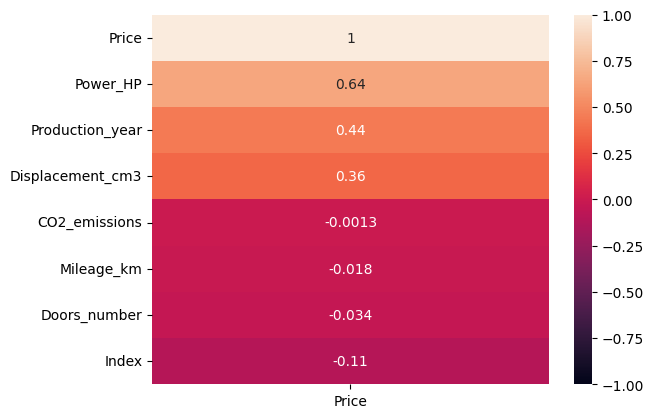

In [5]:
sns.heatmap(data.corr()[['Price']].sort_values(by='Price',ascending=False),vmax=1, vmin=-1,annot=True);

multicolleniarity in power HP and Displacement cm3,,,,
so we dont use  Displacement cm3 column

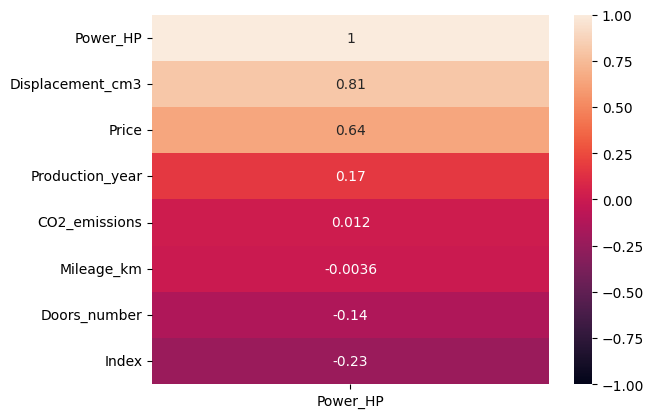

In [6]:
sns.heatmap(data.corr()[['Power_HP']].sort_values(by='Power_HP',ascending=False),vmax=1, vmin=-1,annot=True);

#### checking OUTLIER


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

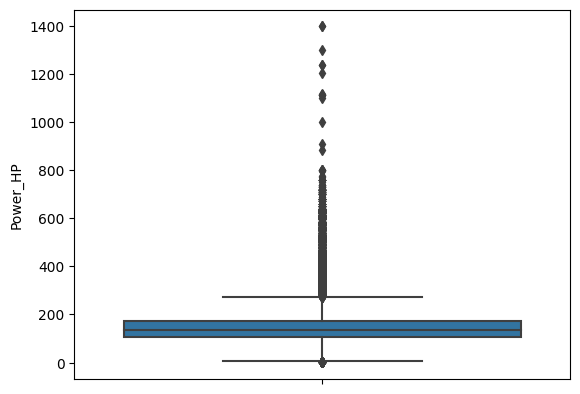

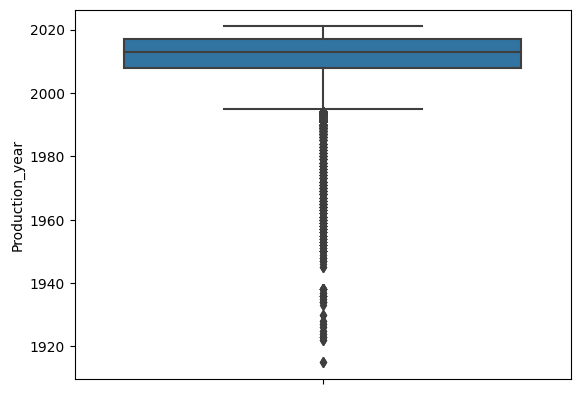

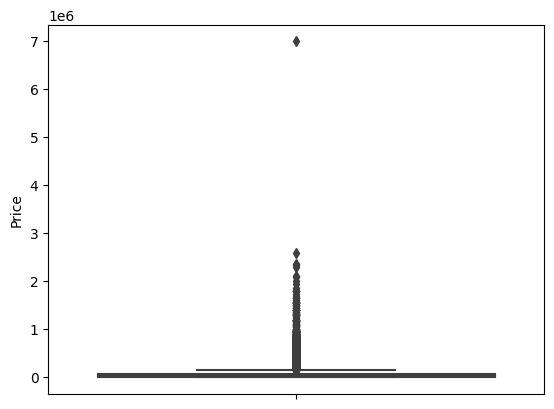

In [8]:
univariate_list = ['Power_HP','Production_year','Price']
for i in univariate_list:
    sns.boxplot(y =data[i])
    plt.show()

### OUTLIER TREATMENT USING IQR METHOD


In [9]:
def outlater_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [10]:
for i in univariate_list:
    UL,LL=outlater_limit(data[i])
    data[i]=np.where((data[i]>UL) | (data[i]<LL),np.nan,data[i])

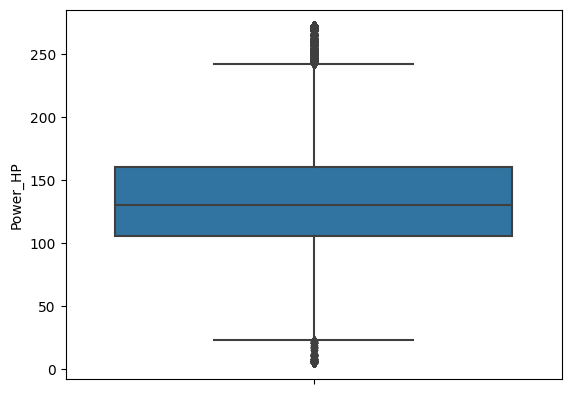

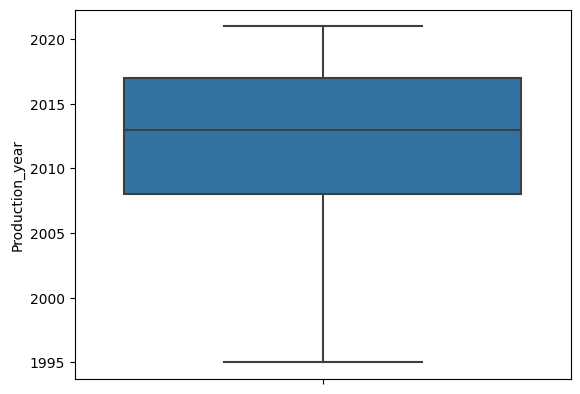

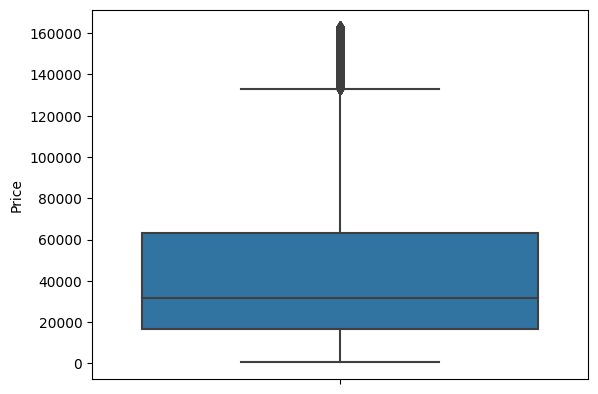

In [11]:
for i in univariate_list:
    sns.boxplot(y =data[i])
    plt.show()

In [12]:
univariate_list

['Power_HP', 'Production_year', 'Price']

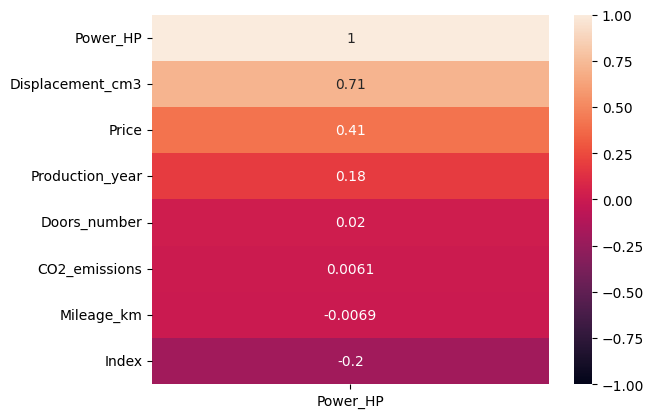

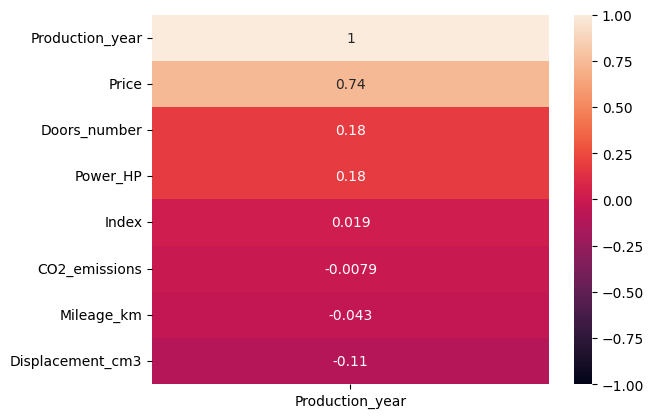

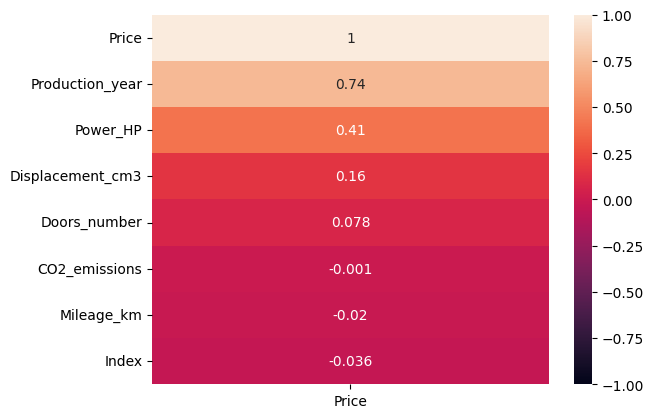

In [19]:
for i in univariate_list:
    sns.heatmap(data.corr()[[i]].sort_values(by=[i],ascending=False),vmax=1, vmin=-1,annot=True);
    plt.show()

In [ ]:
sns.heatmap(data.corr()[['Price']].sort_values(by='Price',ascending=False),vmax=1, vmin=-1,annot=True);

### Explaratory data analysis
#### Univariate analysis
##### Histogram


In [ ]:
for i in univariate_list:
    sns.histplot(x =data[i],kde=True,color='red')
    plt.show()

#### rearrange columns



In [ ]:
data=data[['Power_HP','Production_year','Price']]

In [ ]:
data

In [ ]:
data.isnull().sum()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
data.columns

In [ ]:
#selecting features and targets

x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
x

#### feature scaling


In [ ]:
sc=StandardScaler()

In [ ]:
x=sc.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

creating dictionary of models for itrative purposem

In [ ]:
models={"linearRegression":LinearRegression(),
       "Ridge":Ridge(),
       "Lasso":Lasso(),
       "LinearSVR":LinearSVR(),
       "DecisionTreeRegressor":DecisionTreeRegressor(),
       "AdaBoostRegressor":AdaBoostRegressor(),
       "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [ ]:
for name, model in models.items():
    model.fit(x_train,y_train)
    print("model trained with{}".format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2_score: ",score)
    print("training_score: ",training_score)
    print("testing_score: ",testing_score)
    print("mae: ",mae)
    print("mse: ",mse)
    print("rmse: ",rmse)
    print("*"*100)

#### initializing the model > trained with withDecisionTreeRegressor

In [ ]:
model_11=DecisionTreeRegressor()

In [ ]:
model_11.fit(x_train,y_train)

In [ ]:
y_pred=model_11.predict(x_test)

In [ ]:
OUTPUT=pd.DataFrame(zip(y_test,y_pred),columns=['ACTUAL','PREDICTION'])

In [ ]:
OUTPUT

In [ ]:
sns.regplot(data=OUTPUT,x='ACTUAL',y='PREDICTION')
plt.show()

In [ ]:
OUTPUT['Error'] = OUTPUT.ACTUAL - OUTPUT.PREDICTION

In [ ]:
OUTPUT

In [ ]:
sns.histplot(data=OUTPUT, x='Error', kde=True)
plt.show()